# Project 5

# Linear Regression Challenge

## Rick's Diamonds

### This project has the objective of uploading  a .csv file containing a prediction price of 5000 diamonds. The goal is exclusively to estimate the price of Rick’s 5000 diamonds achieving the smallest amount of error, so they can sell them properly.

### The metric of success is, of course, money. Rick’s goal is to obtain an average error not greater than 950 dollars. The main objective is to create a prediction that will obtain a root mean squared error less than USD 950. A historical diamond dataset will be used generate the optimal regression model.

#### Dataset used : diamonds.csv

## 1. Baseline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

In [190]:
diamonds = pd.read_csv('asset-v1_IRONHACK+DAFT+202002_SAO+type@asset+block@diamonds.csv')

In [4]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48


In [5]:
diamonds.price.mean()

3934.409644462607

Since the mean value is far off the average error we look at the dataset closely to see if we can improve it more.

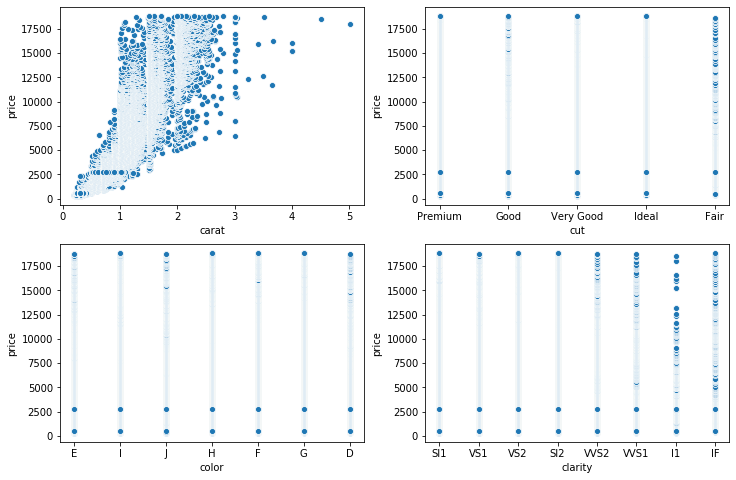

In [17]:
fig, ax = plt.subplots(2,2, figsize=(12,8))
sns.scatterplot(diamonds['carat'], diamonds['price'], ax= ax[0,0])
sns.scatterplot(diamonds['cut'], diamonds['price'], ax= ax[0,1])
sns.scatterplot(diamonds['color'], diamonds['price'], ax= ax[1,0])
sns.scatterplot(diamonds['clarity'], diamonds['price'], ax= ax[1,1])


It can be clearly noticed that there is correlation between carat and price, we can go ahead and estimate an initial price based on carat. Then we build a model.

In [18]:
model = LinearRegression()
X = diamonds[['carat']]
y = diamonds['price']
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

[7759.35277644] -2256.1316930741527


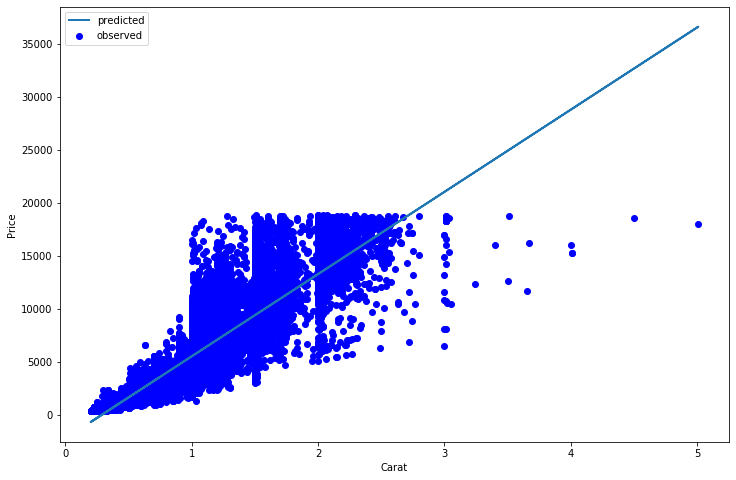

In [19]:
y_pred = model.predict(X)
y_pred
plt.figure(figsize=(12,8))
plt.xlabel('Carat')
plt.ylabel('Price')
plt.scatter(X, y, color='blue', label='observed')
plt.plot(X, y_pred, label='predicted', lw=2)
plt.legend()
print(model.coef_, model.intercept_)

In [23]:
from sklearn.metrics import mean_squared_error

y_observed = diamonds['price']
y_predicted = model.predict(diamonds[['carat']])
mse = mean_squared_error(y_observed, y_predicted)
mse

2380375.235074832

In [27]:
np.sqrt(mse)

1542.8464716474002

The **RMSE gives us an error of USD 1540 approximately**, so it could be a good starting point.

In [169]:
ricks = pd.read_csv('asset-v1_IRONHACK+DAFT+202002_SAO+type@asset+block@rick_diamonds.csv')
ricks.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.91,Very Good,H,SI2,63.4,57.0,6.10,6.18,3.89
1,0.38,Good,F,VS2,60.3,61.0,4.68,4.71,2.83
2,0.52,Ideal,H,VS2,61.8,56.0,5.19,5.16,3.20
3,1.10,Ideal,G,VS1,61.3,56.0,6.65,6.69,4.09
4,2.28,Ideal,G,SI2,61.6,57.0,8.44,8.37,5.18


In [34]:
ricks['price_predicted'] = model.predict(ricks[['carat']]).astype(int)

In [35]:
ricks.head()

,carat,cut,color,clarity,depth,table,x,y,z,price_predicted
0,0.91,Very Good,H,SI2,63.4,57.0,6.10,6.18,3.89,4804
1,0.38,Good,F,VS2,60.3,61.0,4.68,4.71,2.83,692
2,0.52,Ideal,H,VS2,61.8,56.0,5.19,5.16,3.20,1778
3,1.10,Ideal,G,VS1,61.3,56.0,6.65,6.69,4.09,6279
4,2.28,Ideal,G,SI2,61.6,57.0,8.44,8.37,5.18,15435


In [30]:
ricks.shape

(5000, 10)

In [36]:
ricks.to_csv('ricks_raw.csv')

## 2. Data transformation and modeling

In [5]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48


In [191]:
diamonds.shape

(48940, 10)

Since the purpose is modeling a linear regression, it is a good practice to transform categorical data into numerical, considering the relevance of each category: 

In [11]:
diamonds['cut'].value_counts()

Ideal        19608
Premium      12507
Very Good    10922
Good          4443
Fair          1460
Name: cut, dtype: int64

In [192]:
diamonds['cut'].replace('Ideal', 5, inplace=True)
diamonds['cut'].replace('Premium', 4, inplace=True)
diamonds['cut'].replace('Very Good', 3, inplace=True)
diamonds['cut'].replace('Good', 2, inplace=True)
diamonds['cut'].replace('Fair', 1, inplace=True)

In [12]:
diamonds['color'].value_counts()

G    10287
E     8869
F     8653
H     7542
D     6160
I     4889
J     2540
Name: color, dtype: int64

In [193]:
diamonds['color'].replace('D', 7, inplace=True)
diamonds['color'].replace('E', 6, inplace=True)
diamonds['color'].replace('F', 5, inplace=True)
diamonds['color'].replace('G', 4, inplace=True)
diamonds['color'].replace('H', 3, inplace=True)
diamonds['color'].replace('I', 2, inplace=True)
diamonds['color'].replace('J', 1, inplace=True)

In [13]:
diamonds['clarity'].value_counts()

SI1     11832
VS2     11125
SI2      8307
VS1      7449
VVS2     4635
VVS1     3321
IF       1613
I1        658
Name: clarity, dtype: int64

In [194]:
diamonds['clarity'].replace('IF', 8, inplace=True)
diamonds['clarity'].replace('VVS1', 7, inplace=True)
diamonds['clarity'].replace('VVS2', 6, inplace=True)
diamonds['clarity'].replace('VS1', 5, inplace=True)
diamonds['clarity'].replace('VS2', 4, inplace=True)
diamonds['clarity'].replace('SI1', 3, inplace=True)
diamonds['clarity'].replace('SI2', 2, inplace=True)
diamonds['clarity'].replace('I1', 1, inplace=True)

In [195]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.21,4,6,3,59.8,61.0,326,3.89,3.84,2.31
1,0.23,2,6,5,56.9,65.0,327,4.05,4.07,2.31
2,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63
3,0.31,2,1,2,63.3,58.0,335,4.34,4.35,2.75
4,0.24,3,1,6,62.8,57.0,336,3.94,3.96,2.48


By doing some diamond research, the characteristics that impact the most on diamond price are the 4C's: Carat, cut, color and clarity. These characteristics will be used to train the model, and visualize how they affect price. 

In [26]:
X = diamonds[['carat','cut','color','clarity']]
y = diamonds['price']


At this stage, it is possible to separate the dataframe into two groups: Train and Test. The first group is used to fit the model, and the second group is used to predict the model. This procedure will ensure that the metric is actually working when applied to a never seen dataset.

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=99)
X_train

,carat,cut,color,clarity
4834,0.73,1,6,6
38300,0.40,5,5,8
5798,0.90,5,3,4
17700,1.12,5,4,4
11760,1.20,3,2,3
...,...,...,...,...
42697,0.61,4,3,6
36008,0.40,5,3,7
46265,0.73,3,5,3
23587,1.52,5,6,4


In [32]:
diamonds_train = pd.concat([X_train, y_train], axis=1)
diamonds_test = pd.concat([X_test, y_test], axis=1)

In [33]:
model = LinearRegression()
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)

model.fit(X_train_std, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
from sklearn.metrics import mean_squared_error
y_observed = y_test
X_test_std = scaler.transform(X_test)
y_predicted = model.predict(X_test_std)
mse = mean_squared_error(y_observed, y_predicted)
np.sqrt(mse)

1250.2670854426642

It shows that **the error went from USD 1542 to USD 1250**. Not much of a change though. However, there are other features that could be considered in order to improve the model. For example, since the x, y and z dimensions are present, it would be an option to generate a new feature named volume, and see how it impacts price.

In [183]:
diamonds.shape

(48940, 10)

But, before going any further, it is necessary to make sure that all the values for dimensions are greater than 0 to obtain the actual volume of all the gems. Otherwise, they will be removed from the dataset.

In [184]:
diamonds.query('x == 0')
diamonds.query('y == 0')
diamonds.query('z == 0')

,carat,cut,color,clarity,depth,table,price,x,y,z
2010,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2104,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4323,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
4941,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
9187,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
10119,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
10825,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
12290,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
14433,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
22126,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


After doing those queries, it could be observed that 18 observations had at least one 0 value. So they are dropped indeed.

In [185]:
diamonds['x'].replace(0, np.nan, inplace=True)
diamonds['y'].replace(0, np.nan, inplace=True)
diamonds['z'].replace(0, np.nan, inplace=True)

In [186]:
diamonds = diamonds.dropna()

In [187]:
diamonds['volume'] = round(diamonds['x'] * diamonds['y'] * diamonds['z'],1)
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.5
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.1
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.7
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.9
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,38.7
...,...,...,...,...,...,...,...,...,...,...,...
48935,0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.58,116.7
48936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,115.9
48937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,118.1
48938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,114.4


With this new feature, it could be possible to model again, and see if the model's RMSE actually improves. 

After repeating all the steps above, this is the output:

In [188]:
diamonds['volume'].isna().value_counts()

False    48922
Name: volume, dtype: int64

In [ ]:
X = diamonds[['carat','cut','color','clarity','volume']]
y = diamonds['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=99)
diamonds_train = pd.concat([X_train, y_train], axis=1)
diamonds_test = pd.concat([X_test, y_test], axis=1)
model = LinearRegression()
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)

model.fit(X_train_std, y_train)

In [73]:
y_observed = y_test
X_test_std = scaler.transform(X_test)
y_predicted = model.predict(X_test_std)
mse = mean_squared_error(y_observed, y_predicted)
np.sqrt(mse)

1240.715469339244

The model did not improve much. So, the next thing to do would be plotting some features against price to see how they affect it.

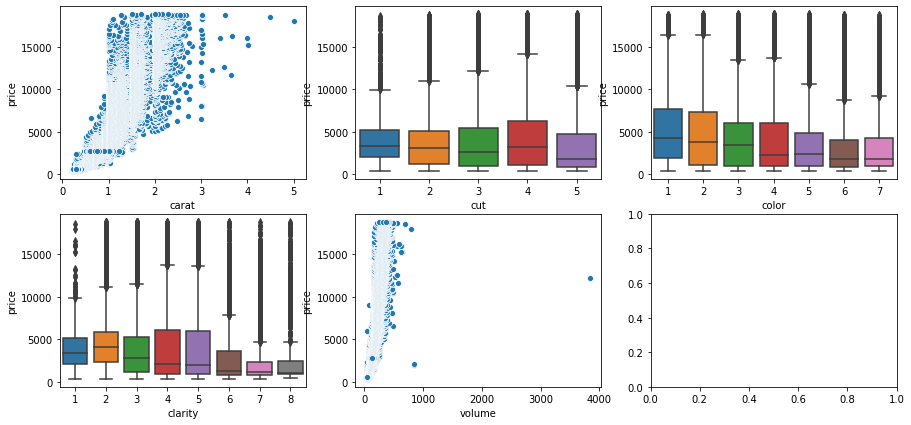

In [81]:
fig, ax = plt.subplots(2,3, figsize=(15,7))
sns.scatterplot(diamonds['carat'], diamonds['price'], ax= ax[0,0])
sns.boxplot(diamonds['cut'], diamonds['price'], ax= ax[0,1])
sns.boxplot(diamonds['color'], diamonds['price'], ax= ax[0,2])
sns.boxplot(diamonds['clarity'], diamonds['price'], ax= ax[1,0])
sns.scatterplot(diamonds['volume'], diamonds['price'], ax= ax[1,1])

## 3. Final Model (below USD 950 RMSE)

### As it can be observed in the very first graph, there is a non-linear relationship between the features. Therefore, it can be modeled as a linear regression by applying a transformation using natural logarithms.

In [182]:
diamonds.shape

(48940, 10)

In order to do this, 60% of the dataset will be used for training, and the remaining 40% will be used for testing. 

In [283]:
X = np.log(diamonds[['carat','cut','color','clarity']])
y = np.log(diamonds['price'])
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, random_state=99)
diamonds_train = pd.concat([X_train, y_train], axis=1)
diamonds_test = pd.concat([X_test, y_test], axis=1)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [286]:
print(model.coef_, model.intercept_)

[1.88064701 0.09653933 0.27467148 0.47861402] 7.395127043844836


In [287]:
y_observed = np.exp(y_test)
y_predicted = model.predict(X_test)
mse = mean_squared_error(y_observed, np.exp(y_predicted))
np.sqrt(mse)

802.4906028012412

### The model shows a RMSE of USD 802 approximately. This means that the goal was met. Now it is time to predict the prices for Rick's diamonds.

In [207]:
ricks1 = ricks.copy()
ricks1['cut'].replace('Ideal', 5, inplace=True)
ricks1['cut'].replace('Premium', 4, inplace=True)
ricks1['cut'].replace('Very Good', 3, inplace=True)
ricks1['cut'].replace('Good', 2, inplace=True)
ricks1['cut'].replace('Fair', 1, inplace=True)
ricks1['color'].replace('D', 7, inplace=True)
ricks1['color'].replace('E', 6, inplace=True)
ricks1['color'].replace('F', 5, inplace=True)
ricks1['color'].replace('G', 4, inplace=True)
ricks1['color'].replace('H', 3, inplace=True)
ricks1['color'].replace('I', 2, inplace=True)
ricks1['color'].replace('J', 1, inplace=True)
ricks1['clarity'].replace('IF', 8, inplace=True)
ricks1['clarity'].replace('VVS1', 7, inplace=True)
ricks1['clarity'].replace('VVS2', 6, inplace=True)
ricks1['clarity'].replace('VS1', 5, inplace=True)
ricks1['clarity'].replace('VS2', 4, inplace=True)
ricks1['clarity'].replace('SI1', 3, inplace=True)
ricks1['clarity'].replace('SI2', 2, inplace=True)
ricks1['clarity'].replace('I1', 1, inplace=True)

In [281]:
XR = np.log(ricks1[['carat','cut','color','clarity']])
ricks['price_predicted'] = np.exp(model.predict(XR))
ricks['price_predicted'] = ricks['price_predicted'].astype(np.int64)

In [282]:
ricks.head()

,carat,cut,color,clarity,depth,table,x,y,z,price_predicted
0,0.91,Very Good,H,SI2,63.4,57.0,6.10,6.18,3.89,2853
1,0.38,Good,F,VS2,60.3,61.0,4.68,4.71,2.83,851
2,0.52,Ideal,H,VS2,61.8,56.0,5.19,5.16,3.20,1458
3,1.10,Ideal,G,VS1,61.3,56.0,6.65,6.69,4.09,7207
4,2.28,Ideal,G,SI2,61.6,57.0,8.44,8.37,5.18,18304


In [277]:
ricks.to_csv('ricks_final.csv')